# Visualization Examples

This script contains several examples of the functionality available as part of the graphing module

In [1]:
# load the visualization package
from graphing import graphing_ready_dataframe
from graphing import visualization
import pandas as pd

In [2]:
# load the sample datasets
cps = pd.read_pickle('example_data/cps_sample.pkl')
sipp = pd.read_pickle('example_data/sipp_sample.pkl')

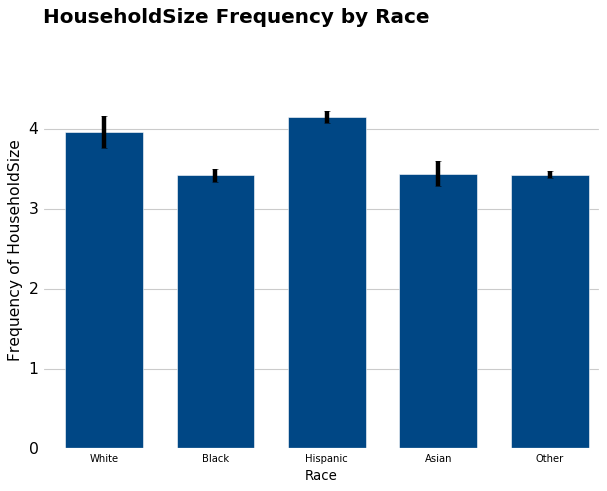

In [3]:
# create a simple graph measuring average household size by race
result_dataframe = graphing_ready_dataframe(cps, 'Race', 'HouseholdSize')
visualization(result_dataframe, 'Race', 'HouseholdSize', categorical=True, 
              categorical_coding=['White', 'Black', 'Hispanic', 'Asian', 'Other'])

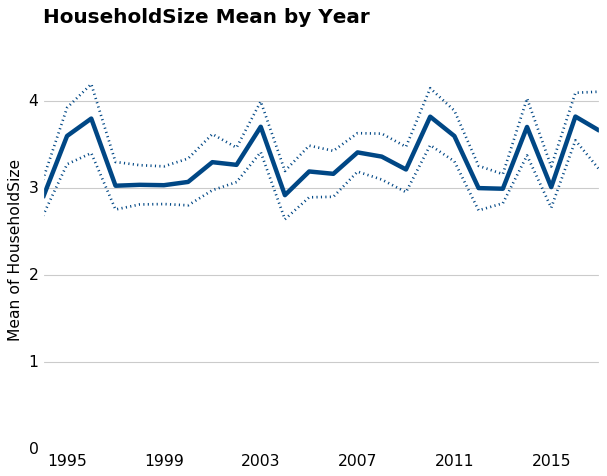

In [4]:
result_dataframe = graphing_ready_dataframe(cps, 'SurveyYear', 'HouseholdSize', datetime=True, weights='Weight')
visualization(result_dataframe, 'Year', 'HouseholdSize', categorical=False, moment_type='Mean')

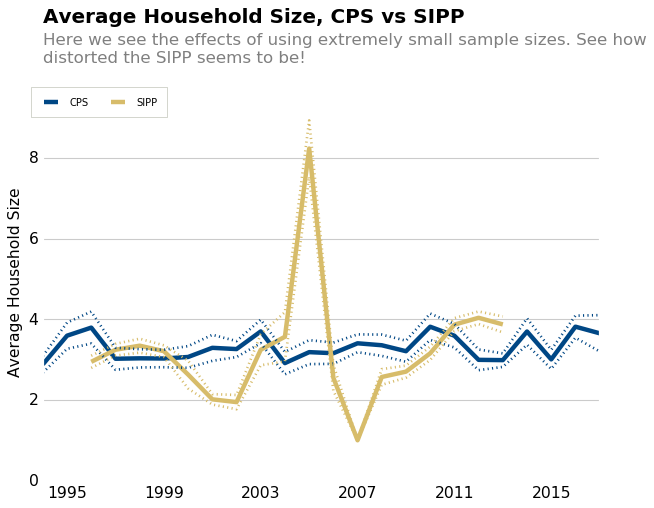

In [5]:
cps_dataframe = graphing_ready_dataframe(cps, 'SurveyYear', 'HouseholdSize', datetime=True, weights='Weight')
sipp['HouseholdSize'] = sipp[['PersonID', 'HouseholdID', 'Month', 'Year']].groupby(
    ['HouseholdID', 'Month', 'Year']).transform('count')
sipp_dataframe = graphing_ready_dataframe(sipp, 'Year', 'HouseholdSize', datetime=True, weights='Weight')

visualization(
    [cps_dataframe, sipp_dataframe], 
    'Year', 
    'HouseholdSize', 
    moment_type='Mean',
    label_list = ['CPS', 'SIPP'],
    custom_title = 'Average Household Size, CPS vs SIPP',
    custom_axis = 'Average Household Size',
    subtitle = 'Here we see the effects of using extremely small sample sizes. See how distorted the SIPP seems to be!',
)

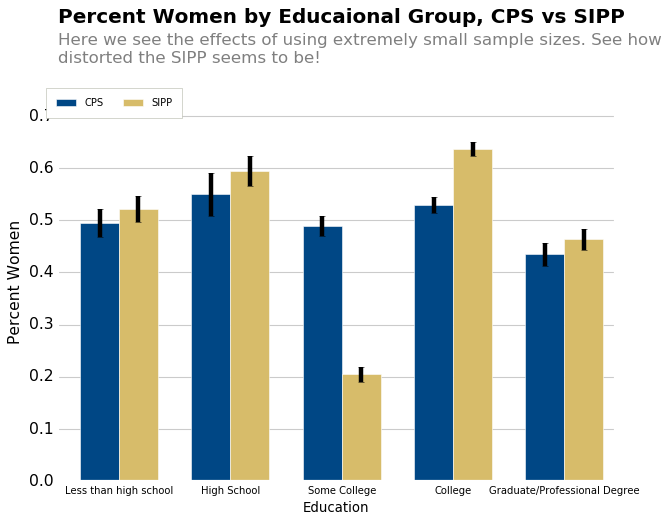

In [20]:
try:
    cps['Gender'] = cps.Gender.cat.codes
    sipp['Gender'] = sipp.Gender.cat.codes
except AttributeError:
    pass

cps_dataframe = graphing_ready_dataframe(cps, 'Education', 'Gender', weights='Weight', moment_type = 'Frequency')
sipp_dataframe = graphing_ready_dataframe(sipp, 'Education', 'Gender', weights='Weight', moment_type = 'Frequency')

visualization(
    [cps_dataframe, sipp_dataframe], 
    'Education', 
    'Gender', 
    moment_type='Frequency',
    label_list = ['CPS', 'SIPP'],
    categorical=True,
    categorical_coding = ['Less than high school', 'High School', 'Some College', 'College', 'Graduate/Professional Degree'],
    custom_title = 'Percent Women by Educaional Group, CPS vs SIPP',
    custom_axis = 'Percent Women',
    subtitle = 'Here we see the effects of using extremely small sample sizes. See how distorted the SIPP seems to be!',
)